In [1]:
%cd /content

/content


In [2]:
!git clone https://github.com/hagamiyuusan/VTO

Cloning into 'VTO'...
remote: Enumerating objects: 821, done.
remote: Counting objects: 100% (821/821), done.
remote: Compressing objects: 100% (693/693), done.
remote: Total 821 (delta 113), reused 821 (delta 113), pack-reused 0
Receiving objects: 100% (821/821), 17.04 MiB | 13.11 MiB/s, done.
Resolving deltas: 100% (113/113), done.


In [3]:
!pip install ninja 

!pip install einops tensorboardX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.8 MB/s eta 0:00:00


In [4]:
!gdown 1s5CBJU2ZIridXjBaLsEETMla9LvBy1pU
!gdwon 1MTshOXQqJkJLmZ96rSLqDr8npsvrXbzL
!gdown 144yH67Ztn95WDoVZ_GBP25dAdsZICgSO
!gdown 1nVVcKI0GImCgiGR5cfGaknTtcc-iuJe4
!gdown 1bOs6BWtalK3Ch9-hVdAXZn7yyzQpTWg0
!gdown 1VBI8Nx3YL20UdfRGfn2IvH-rw40-LLVM

Downloading...
From: https://drive.google.com/uc?id=1s5CBJU2ZIridXjBaLsEETMla9LvBy1pU
To: /content/CIT_final.pth
100% 3.49G/3.49G [00:48<00:00, 72.2MB/s]
/bin/bash: line 1: gdwon: command not found
Downloading...
From: https://drive.google.com/uc?id=144yH67Ztn95WDoVZ_GBP25dAdsZICgSO
To: /content/exp-schp-201908301523-atr.pth
100% 267M/267M [00:07<00:00, 36.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nVVcKI0GImCgiGR5cfGaknTtcc-iuJe4
To: /content/step_115000_final2.pth
100% 97.5M/97.5M [00:02<00:00, 40.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bOs6BWtalK3Ch9-hVdAXZn7yyzQpTWg0
To: /content/tom_50000_sala.pth
100% 85.4M/85.4M [00:02<00:00, 40.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VBI8Nx3YL20UdfRGfn2IvH-rw40-LLVM
To: /content/TOM_step_250000_dresses.pth
100% 85.4M/85.4M [00:01<00:00, 79.2MB/s]


In [5]:
from PIL import Image, ImageOps, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import json
from pathlib import Path

In [6]:
%cd /content/VTO

/content/VTO


For visualization:

In [7]:
def plot_img_list(img_list,fig_size=6):
    k = len(img_list)
    figure, ax = plt.subplots(nrows=1, ncols=k, figsize=(fig_size, fig_size))

    for index in range(k):
        ax[index].imshow(img_list[index])

    figure.tight_layout()
    figure.show()
    plt.show()

In [8]:
def ContrastStretching(img, min_o = 0, max_o = 255):

  out = (img - img.min())*((max_o - min_o)/(img.max() - img.min())) + min_o
  return out.astype(img.dtype)


In [9]:
%cd /content/VTO


/content/VTO


In [11]:
image = Image.open("/content/segment9.png")
resized = image.resize((384, 512))
resized.save("/content/download3.jpg")



In [13]:
cloth_image = cv2.imread(r"/content/download3.jpg")
person_image = cv2.imread(r"/content/VTO/input_images/people/000000_0.jpg")

cv2.imwrite('./result/images/000179_0.jpg', person_image)
cv2.imwrite('./result/cloth/000136_1.jpg', cloth_image)


True

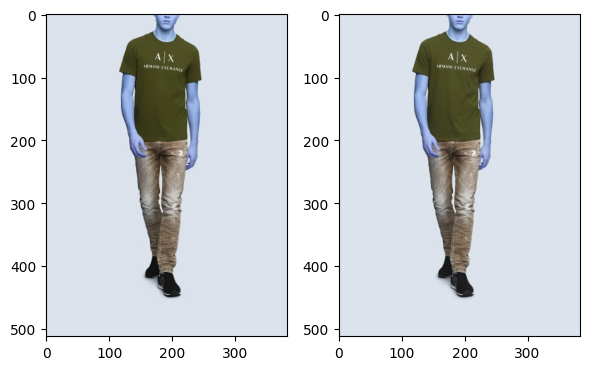

In [14]:


person_image_proc = ContrastStretching(person_image)

person_image_proc = cv2.bilateralFilter(person_image_proc, 20, 15, 15)

show_list = [person_image_proc, person_image]


plot_img_list(show_list)


In [16]:
%cd /content/VTO/people-preprocessing

!python simple_extractor.py --dataset 'atr' --input-dir ./../result/images --output-dir ./../result/label_maps --model-restore /content/exp-schp-201908301523-atr.pth

%cd ..

/content/VTO/people-preprocessing
Evaluating total class number 18 with ['Background', 'Hat', 'Hair', 'Sunglasses', 'Upper-clothes', 'Skirt', 'Pants', 'Dress', 'Belt', 'Left-shoe', 'Right-shoe', 'Face', 'Left-leg', 'Right-leg', 'Left-arm', 'Right-arm', 'Bag', 'Scarf']
100% 1/1 [00:06<00:00,  6.59s/it]
/content/VTO


/content/VTO


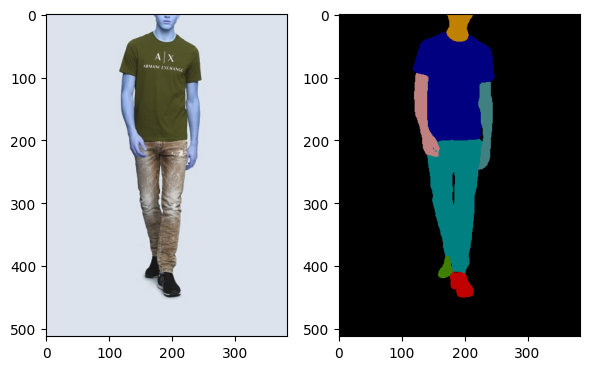

In [17]:
%cd /content/VTO
labels_image = cv2.imread(r"./result/label_maps/000179_4.png")
labels_image = cv2.cvtColor(labels_image, cv2.COLOR_BGR2RGB)

show_list = [person_image, labels_image]

plot_img_list(show_list)

## Mask Image Generation


In [19]:
import cv2

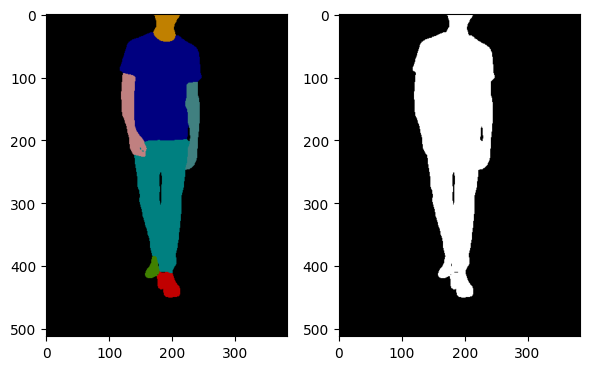

In [20]:
def get_mask_from_labels(img):

    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img[img != 0] = 255
    return img

mask_image = get_mask_from_labels(labels_image)

cv2.imwrite('./result/image-mask/000179_0.png', mask_image)

show_list = [labels_image, cv2.cvtColor(mask_image, cv2.COLOR_GRAY2RGB)]

plot_img_list(show_list)


## KEYPOINT EXTRACTION with Detectron2


In [21]:
%cd /content

/content


In [22]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15280, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15280 (delta 0), reused 3 (delta 0), pack-reused 15275
Receiving objects: 100% (15280/15280), 6.17 MiB | 18.59 MiB/s, done.
Resolving deltas: 100% (11111/11111), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00
  Prepari

In [23]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.1 ; cuda:  cu118
detectron2: 0.6


In [24]:
%cd /content/VTO

/content/VTO


In [25]:
%cd detectron2_scripts/
import d2
%cd ..

/content/VTO/detectron2_scripts
/content/VTO


In [26]:
openpose_keypoints = d2.get_keypoints(person_image)
openpose_keypoints.shape
#print(openpose_keypoints)

model_final_a6e10b.pkl: 237MB [00:01, 177MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([18, 3])

In [27]:
def json_parser(tensor_keypoints):

    parsed_list = []

    data = {}
    data['version'] = 1.0,
    data['people'] = {}
    data['people']['face_keypoints'] = []
    data['people']['pose_keypoints'] = []
    data['people']['hand_right_keypoints'] = []
    data['people']['hand_left_keypoints'] = []


    keypoints = tensor_keypoints.tolist()

    for keypoint in keypoints:

        if -1.0 not in keypoint[:3]: data['people']['pose_keypoints'].extend(keypoint[:3])
        else: data['people']['pose_keypoints'].extend([0,0,0])

        parsed_list.append(json.dumps(data))

    return json.dumps(data)


In [28]:
with open("./result/keypoints-openpose/000179_2.json", "w") as outfile:
    outfile.write(json_parser(openpose_keypoints))

In [29]:
def draw_keypoints(tensor_keypoints, height, width, radius):
  point_num = tensor_keypoints.shape[0]
  r = radius
  im_pose = Image.new('L', (width, height))
  pose_draw = ImageDraw.Draw(im_pose)

  for i in range(point_num):

    pose_draw = ImageDraw.Draw(im_pose)
    pointx = tensor_keypoints[i, 0]
    pointy = tensor_keypoints[i, 1]
    if pointx > 1 and pointy > 1:
      pose_draw.rectangle((pointx-r, pointy-r, pointx+r, pointy+r), 'white', 'white')

  return im_pose


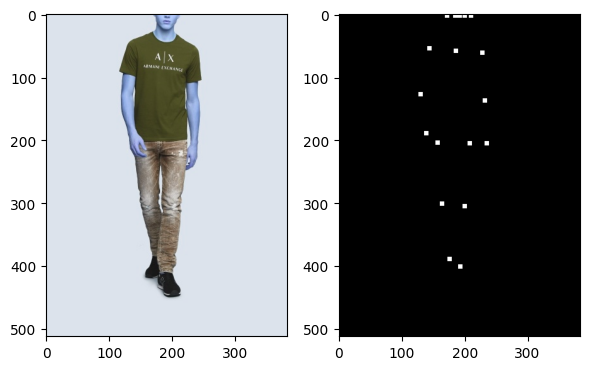

In [30]:
im_pose = draw_keypoints(openpose_keypoints, 512, 384, 3)

show_list = [person_image, cv2.cvtColor(np.array(im_pose), cv2.COLOR_GRAY2RGB)]

plot_img_list(show_list)

## Cloth mask generation

In [31]:
def generateMask(img, sharpenLevel = 0):

  

    
    contrast = 1.05    
    brightness = 0.05  

    

    adjusted = cv2.addWeighted(img, contrast, img, 0, brightness)

    #Sharpening kernel 1
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

    if(sharpenLevel == 1):
        adjusted = cv2.filter2D(adjusted, -1, kernel)

    v = np.median(adjusted)
    sigma = 0.99

    lower_thresh = int(max(0, (1.0 - sigma) * v))
    upper_thresh = int(min(255, (1.0 + sigma) * v))

    edges = cv2.Canny(adjusted, 0, 255)

    edges = cv2.dilate(edges, np.ones((5, 5), np.uint8))

    contours, hierarchy = cv2.findContours(edges,
                                           cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Canny Edges After Contouring

    print("Number of Contours found = " + str(len(contours)))

    # Draw all contours
    # -1 signifies drawing all contours
    mask = np.zeros(img.shape, dtype=np.uint8)

    cv2.drawContours(mask, contours, 0, color=(255, 255, 255), thickness=cv2.FILLED)

    if (sharpenLevel == 1):
        mask = cv2.medianBlur(mask, 33)

    #computing White/Black Ratio

    mask_white_count = (mask==255).sum()
    mask_black_count = (mask==0).sum()

    wb_ratio = mask_white_count/mask_black_count

    return mask

Number of Contours found = 1


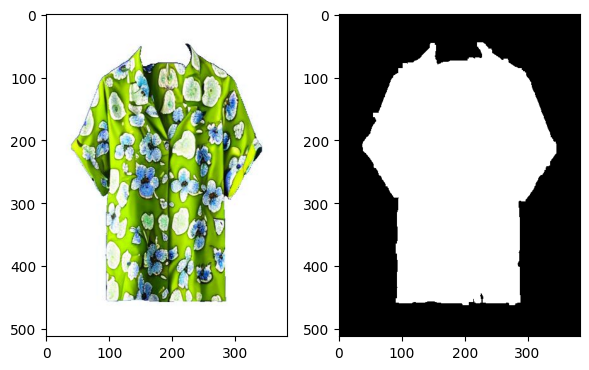

True

In [32]:
cloth_mask = generateMask(np.array(cloth_image), sharpenLevel = 0)

show_list = [cloth_image, cloth_mask]

plot_img_list(show_list)
cv2.imwrite('./result/cloth-mask/000136_1.png', cloth_mask)

In [ ]:
cloth_mask.shape

(512, 384, 3)

# GMM Inference

In [33]:
%cd network

/content/VTO/network


In [34]:
import subprocess
import shutil
import time

t = time.time()
!python test.py --name GMM --stage GMM --workers 4 --dataroot ./../result --datamode test --data_list ./../result/inference.txt --checkpoint /content/step_115000_final2.pth

Namespace(name='GMM', dress_type='upper', gpu_ids='', workers=4, batch_size=4, dataroot='./../result', datamode='test', stage='GMM', data_list='./../result/inference.txt', fine_width=384, fine_height=512, radius=5, grid_size=10, tensorboard_dir='tensorboard', result_dir='result', checkpoint='/content/step_115000_final2.pth', display_count=1, shuffle=False)
Start to test stage: GMM, named: GMM!
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
initialization method [normal]
initialization method [normal]
step:        1, time: 0.586
Finished test GMM, named: GMM!


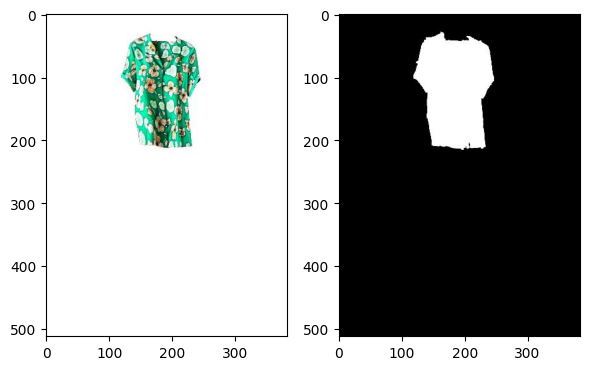

In [35]:
warped_cloth = Image.open(r"result/GMM/test/warp-cloth/000179_0.jpg")
warped_mask = cv2.imread(r"result/GMM/test/warp-mask/000179_0.jpg")

cv2.cvtColor(np.array(warped_cloth), cv2.COLOR_BGR2RGB)

show_list3 = [warped_cloth, warped_mask]

plot_img_list(show_list3)

Try-On Module INFERENCE

In [36]:
warp_cloth = "result/GMM/test/warp-cloth"
warp_mask = "result/GMM/test/warp-mask"

shutil.copytree(warp_cloth, "../result/warp-cloth", dirs_exist_ok=True)
shutil.copytree(warp_mask, "../result/warp-mask", dirs_exist_ok=True)

'../result/warp-mask'

# Try-on Module

In [37]:
%cd /content/VTO/network

/content/VTO/network


In [38]:
!python test.py --name TOM --stage TOM --workers 4 --datamode test --dataroot /content/VTO/result --data_list /content/VTO/result/inference.txt --checkpoint /content/CIT_final.pth

Namespace(name='TOM', dress_type='upper', gpu_ids='', workers=4, batch_size=4, dataroot='/content/VTO/result', datamode='test', stage='TOM', data_list='/content/VTO/result/inference.txt', fine_width=384, fine_height=512, radius=5, grid_size=10, tensorboard_dir='tensorboard', result_dir='result', checkpoint='/content/CIT_final.pth', display_count=1, shuffle=False)
Start to test stage: TOM, named: TOM!
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Dataset size: 00001!
step:        1, time: 1.503
Finished test TOM, named: TOM!


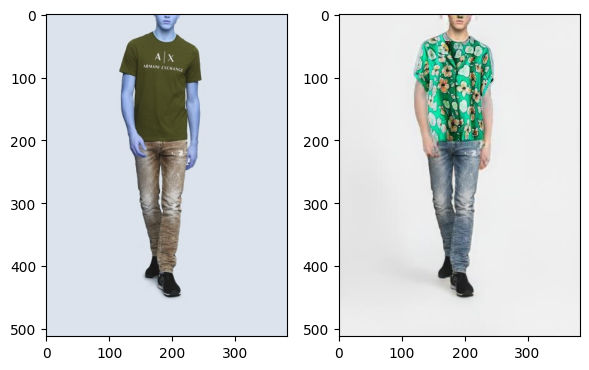

In [39]:
tryon = cv2.imread(r"./result/TOM/test/try-on/000179_0.jpg")

try_on_path = "./result/TOM/test/try-on"

shutil.copytree(try_on_path, "./../result/tryon/ours", dirs_exist_ok=True)

tryon = cv2.cvtColor(tryon, cv2.COLOR_BGR2RGB)

show_list = [person_image, tryon]

plot_img_list(show_list)